In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [2]:
df = pd.read_csv('/content/All_stocks.csv')

In [3]:
df= df[df['Date']>='2021-01-01']

In [4]:
apple_df = df[df['Name'] == 'Apple']
amazon_df=df[df['Name'] == 'Amazon']
facebook_df=df[df['Name'] == 'Facebook']
google_classA_df=df[df['Name'] == 'Google_classA']
google_classC_df=df[df['Name'] == 'Google_classC']
netflix_df=df[df['Name'] == 'Netflix']


In [5]:
apple_df = apple_df.drop(columns=apple_df.columns.difference(['Date', 'Close']))

amazon_df = amazon_df.drop(columns=amazon_df.columns.difference(['Date', 'Close']))

facebook_df = facebook_df.drop(columns=facebook_df.columns.difference(['Date', 'Close']))

google_classA_df = google_classA_df.drop(columns=google_classA_df.columns.difference(['Date', 'Close']))

google_classC_df = google_classC_df.drop(columns=google_classC_df.columns.difference(['Date', 'Close']))

netflix_df = netflix_df.drop(columns=netflix_df.columns.difference(['Date', 'Close']))

In [6]:
apple_df.columns = ['ds','y']
amazon_df.columns = ['ds','y']
facebook_df.columns = ['ds','y']
google_classA_df.columns = ['ds','y']
google_classC_df.columns = ['ds','y']
netflix_df.columns = ['ds','y']

In [7]:
def fbprophet(df_names):
  # Create the model Object
  model=Prophet()
  # Drop any rows with missing data in the DataFrame
  df_names.dropna(axis=0,inplace=True)
  # Fit the model
  model.fit(df_names)
  # Create a new DataFrame with future dates, up to 365 days in the future
  future_dates=model.make_future_dataframe(periods=365)
  # Generates a prediction for each future date using the model
  prediction=model.predict(future_dates)
  # Plots the prediction using the model's built-in plotting function
  model.plot(prediction)
  # Visualize Each Components[Trends,yearly]
  model.plot_components(prediction)
  # Return the prediction and the trained model object
  return prediction,model


### Apple Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/c1v08_jm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/z_fj1aj6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43083', 'data', 'file=/tmp/tmprbzaa768/c1v08_jm.json', 'init=/tmp/tmprbzaa768/z_fj1aj6.json', 'output', 'file=/tmp/tmprbzaa768/prophet_modeliva2jfmi/prophet_model-20230413185359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:53:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


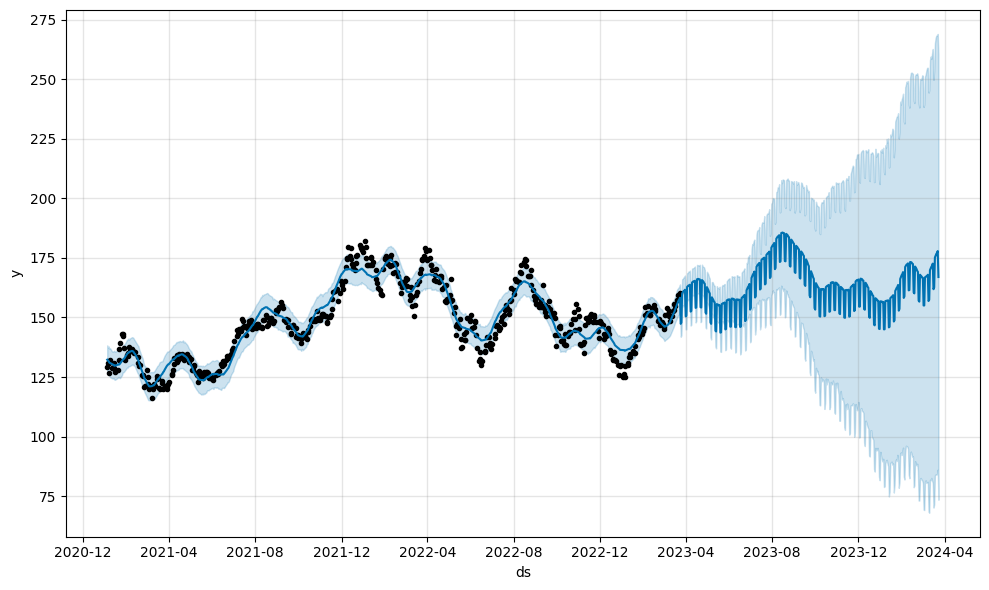

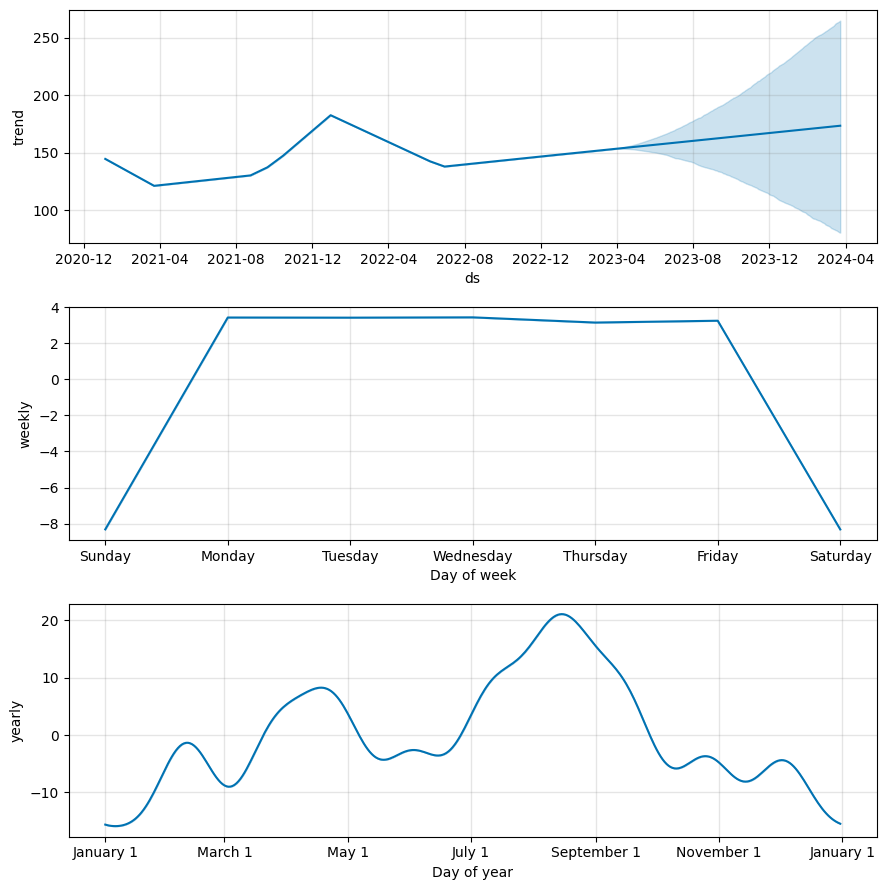

In [8]:
appl_pred,appl_model = fbprophet(apple_df)

In [9]:
# Cross Validation
appl_cv = cross_validation(appl_model, initial='250 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2021-09-25 00:00:00 and 2022-03-24 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/ssw1i9wl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/ju71kgdj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34810', 'data', 'file=/tmp/tmprbzaa768/ssw1i9wl.json', 'init=/tmp/tmprbzaa768/ju71kgdj.json', 'output', 'file=/tmp/tmprbzaa768/prophet_modelank39a79/prophet_model-20230413185401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/2zsrarbu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/eez8rjth.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [10]:
appl_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,148.787738,146.308436,151.213279,145.37,2021-09-25
1,2021-09-28,150.182605,147.474107,152.746686,141.91,2021-09-25
2,2021-09-29,151.636986,149.028055,154.380595,142.83,2021-09-25
3,2021-09-30,153.849336,151.180784,156.397125,141.50,2021-09-25
4,2021-10-01,156.189703,153.766269,158.641420,142.65,2021-09-25


In [11]:
# Performance Metrics
appl_p = performance_metrics(appl_cv)

In [12]:
appl_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,828.349226,28.781057,22.511418,0.150406,0.085774,0.134519,0.08
1,37 days,829.727952,28.804999,22.562861,0.150991,0.091095,0.134962,0.08
2,38 days,830.929213,28.825843,22.663910,0.151650,0.091095,0.135595,0.08
3,39 days,830.776963,28.823202,22.582722,0.151046,0.091095,0.134949,0.10
4,40 days,827.449821,28.765428,22.379180,0.149800,0.089594,0.133648,0.10


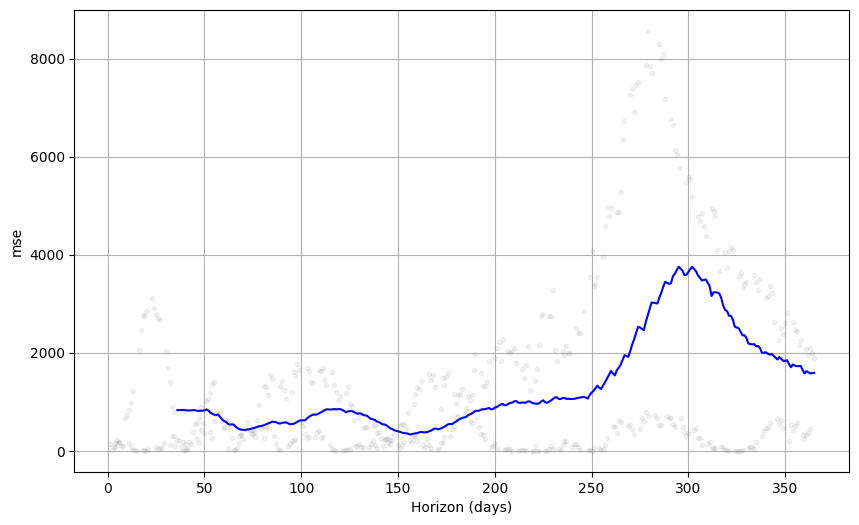

In [13]:
# Plotting 
fig1 = plot_cross_validation_metric(appl_cv, metric='mse')

### Amazon Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/8reqak8e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/yzq98ljt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45279', 'data', 'file=/tmp/tmprbzaa768/8reqak8e.json', 'init=/tmp/tmprbzaa768/yzq98ljt.json', 'output', 'file=/tmp/tmprbzaa768/prophet_model9ezvk86v/prophet_model-20230413185403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


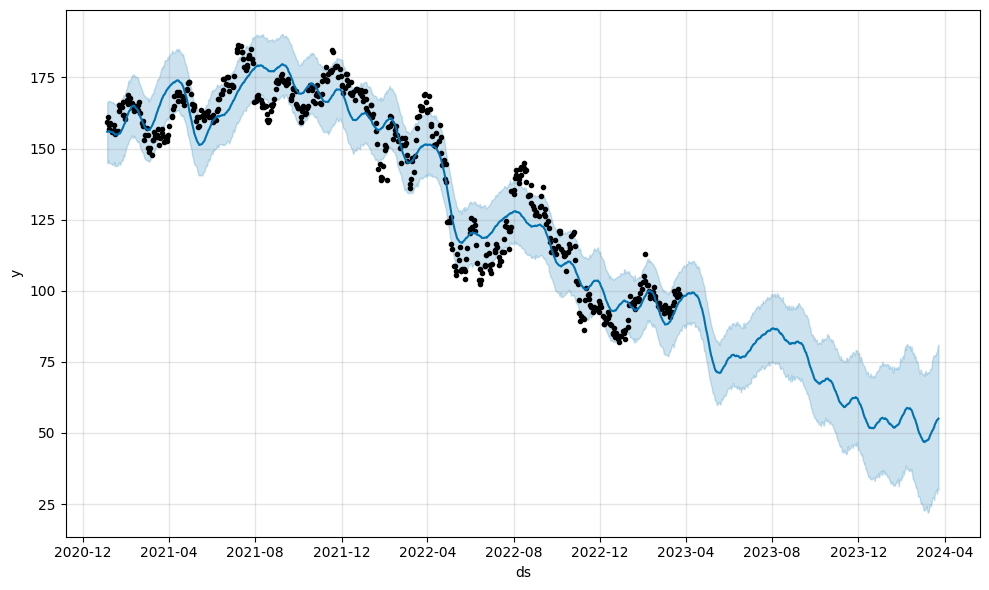

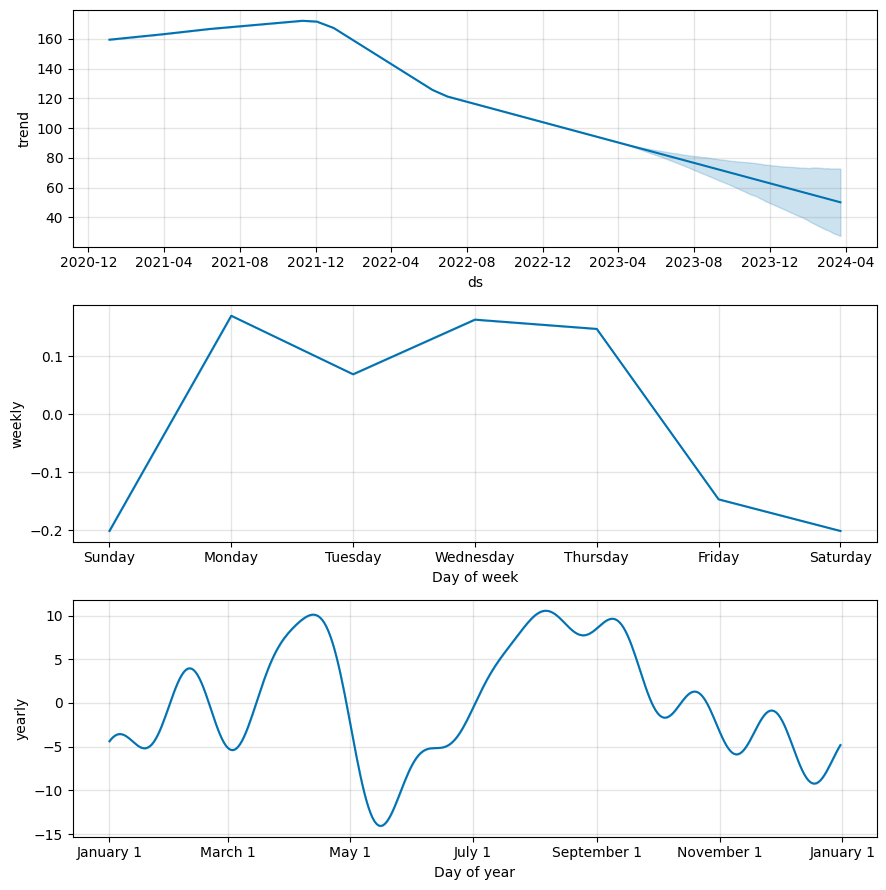

In [14]:
amz_pred,amz_model = fbprophet(amazon_df)

In [15]:
# Cross Validation - Amazon
amz_cv = cross_validation(amz_model, initial='250 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2021-09-25 00:00:00 and 2022-03-24 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/705n0vwp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/tslcguic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11058', 'data', 'file=/tmp/tmprbzaa768/705n0vwp.json', 'init=/tmp/tmprbzaa768/tslcguic.json', 'output', 'file=/tmp/tmprbzaa768/prophet_model0p63fqi3/prophet_model-20230413185405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/b1frjt5f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/n0iqh3q5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [16]:
amz_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,171.103855,167.560801,174.234163,170.29,2021-09-25
1,2021-09-28,172.155514,168.978575,175.623783,165.80,2021-09-25
2,2021-09-29,173.077456,169.795647,176.469758,165.06,2021-09-25
3,2021-09-30,174.312948,170.942232,177.621234,164.25,2021-09-25
4,2021-10-01,175.493131,171.945266,178.795081,164.16,2021-09-25


In [17]:
# Performance Metrics - Amazon
amz_p = performance_metrics(amz_cv)

In [18]:
amz_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,431.092981,20.762779,17.885598,0.112212,0.104168,0.104986,0.08
1,37 days,431.098212,20.762905,17.885830,0.112204,0.104168,0.104885,0.08
2,38 days,432.678536,20.800926,18.048078,0.113186,0.104168,0.105839,0.06
3,39 days,458.362456,21.409401,18.506594,0.117490,0.117075,0.109309,0.08
4,40 days,482.728509,21.971083,18.903926,0.121442,0.125667,0.112388,0.08


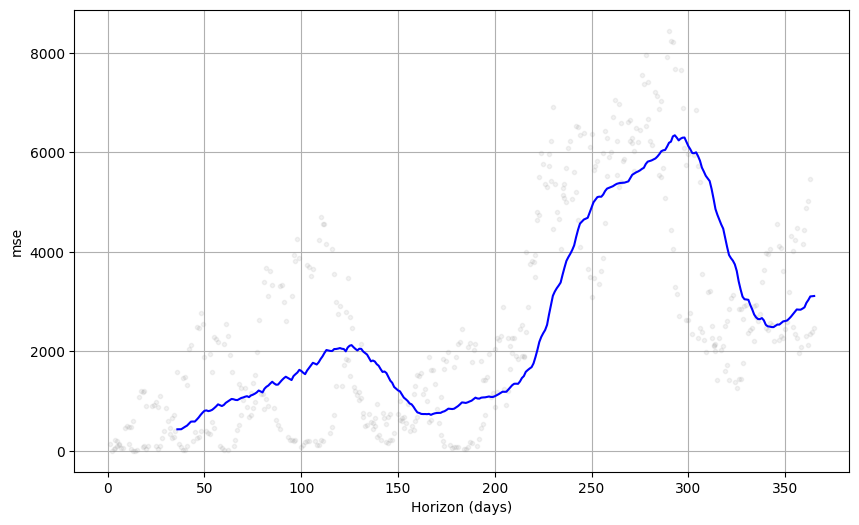

In [19]:
# Plotting - Amazon
fig2 = plot_cross_validation_metric(amz_cv, metric='mse')

### Facebook Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/195f87s5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/o4v91tac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=427', 'data', 'file=/tmp/tmprbzaa768/195f87s5.json', 'init=/tmp/tmprbzaa768/o4v91tac.json', 'output', 'file=/tmp/tmprbzaa768/prophet_modelqq4e298e/prophet_model-20230413185406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


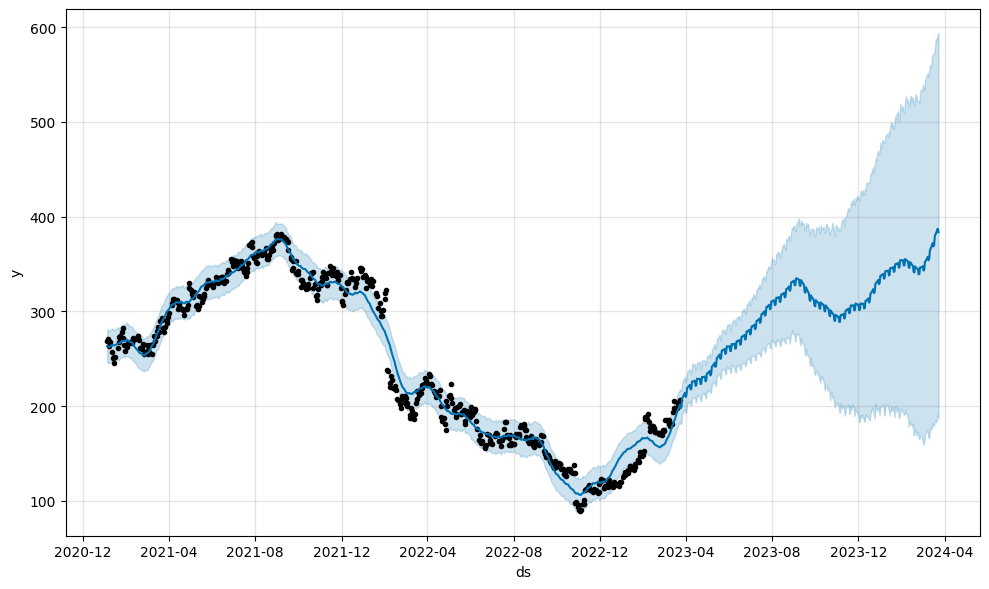

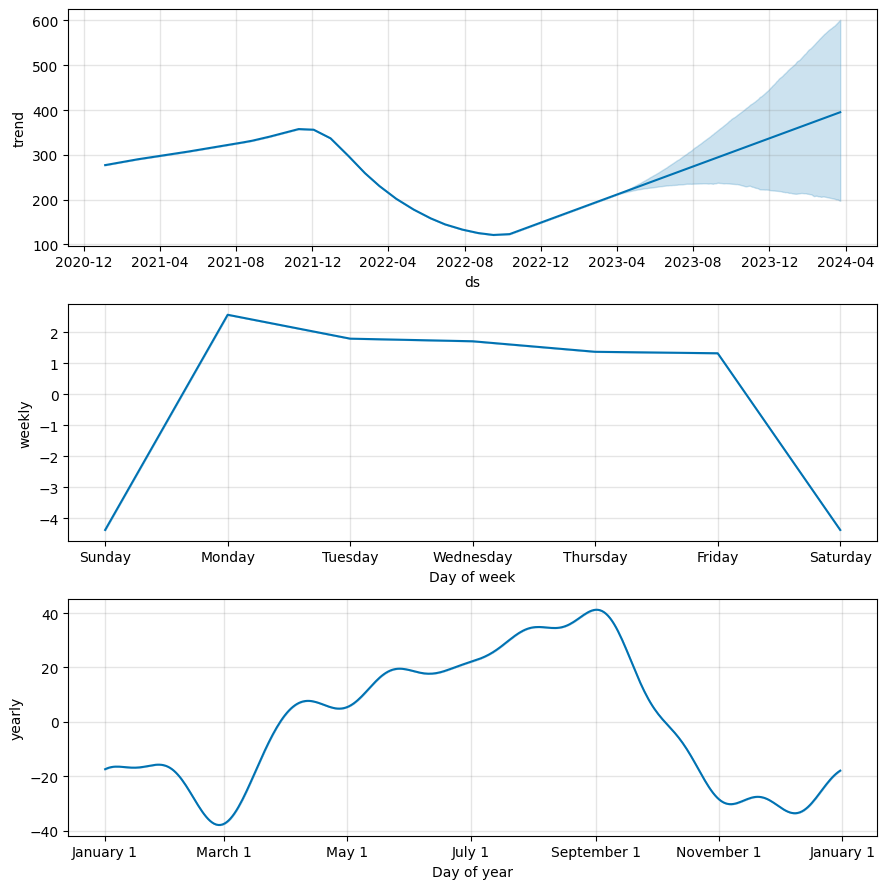

In [20]:
fb_pred,fb_model = fbprophet(facebook_df)

In [21]:
# Cross Validation - Facebook
fb_cv = cross_validation(fb_model, initial='250 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2021-09-25 00:00:00 and 2022-03-24 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/ujtc1963.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/apfiq0y6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46176', 'data', 'file=/tmp/tmprbzaa768/ujtc1963.json', 'init=/tmp/tmprbzaa768/apfiq0y6.json', 'output', 'file=/tmp/tmprbzaa768/prophet_modelgh4njaqa/prophet_model-20230413185408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/wgcv7sp0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/6uo0ro1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [22]:
fb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,356.631492,348.368373,364.621392,353.58,2021-09-25
1,2021-09-28,360.970725,352.423220,369.154263,340.65,2021-09-25
2,2021-09-29,365.448661,357.554845,373.227928,339.61,2021-09-25
3,2021-09-30,372.697137,364.334804,380.943132,339.39,2021-09-25
4,2021-10-01,381.748134,374.025217,390.218075,343.01,2021-09-25


In [23]:
# Performance Metrics - Facebook
fb_p = performance_metrics(fb_cv)

In [24]:
fb_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,16542.746014,128.618607,87.553297,0.278252,0.098985,0.222205,0.20
1,37 days,16703.808052,129.243213,89.044574,0.282277,0.102635,0.225499,0.20
2,38 days,16799.708362,129.613689,90.369809,0.286330,0.106716,0.229148,0.18
3,39 days,16832.957731,129.741889,90.949193,0.288914,0.112702,0.231841,0.18
4,40 days,16830.588037,129.732756,90.855091,0.289188,0.117772,0.232333,0.18


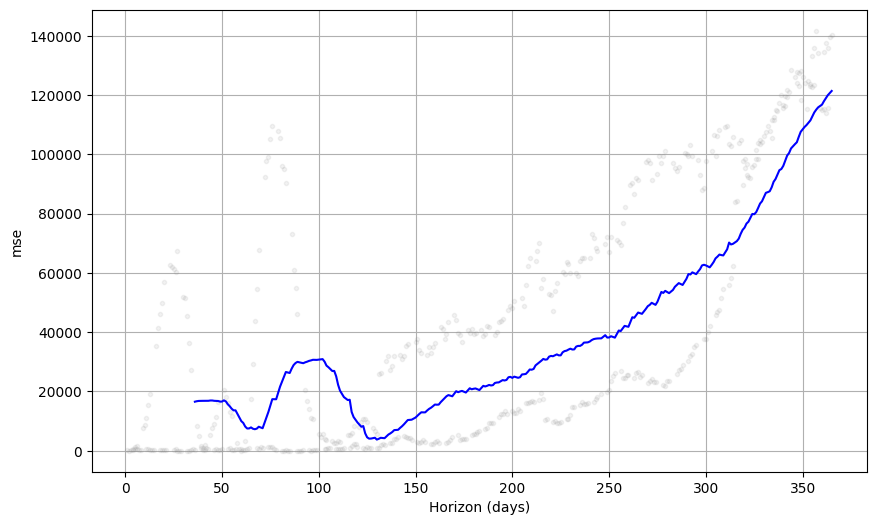

In [25]:
# Plotting - Facebook
fig3 = plot_cross_validation_metric(fb_cv, metric='mse')

### Google Class A Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/rul89xsq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/dxt9q4lb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77109', 'data', 'file=/tmp/tmprbzaa768/rul89xsq.json', 'init=/tmp/tmprbzaa768/dxt9q4lb.json', 'output', 'file=/tmp/tmprbzaa768/prophet_modelsrn5uu2_/prophet_model-20230413185411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


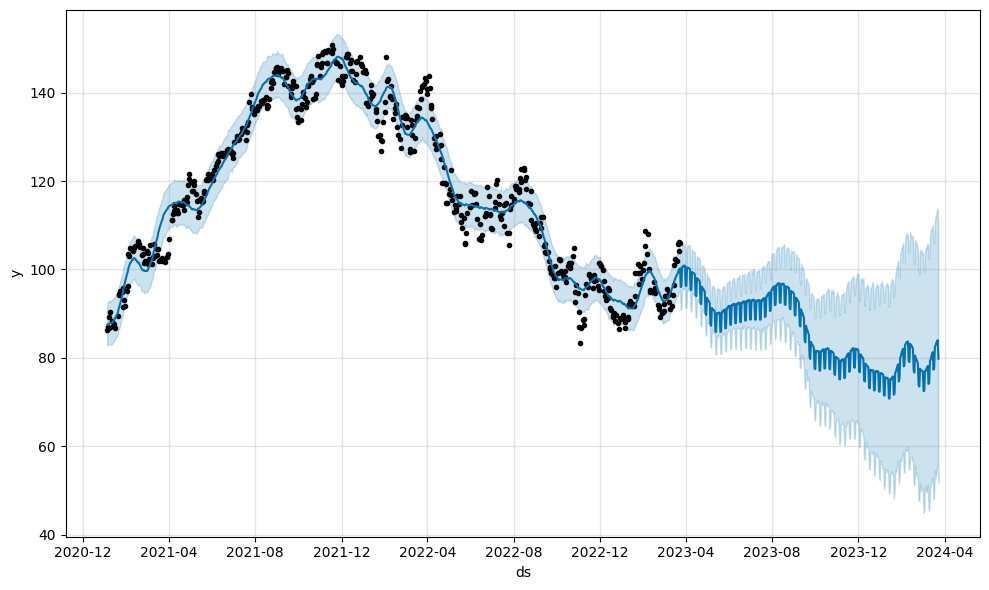

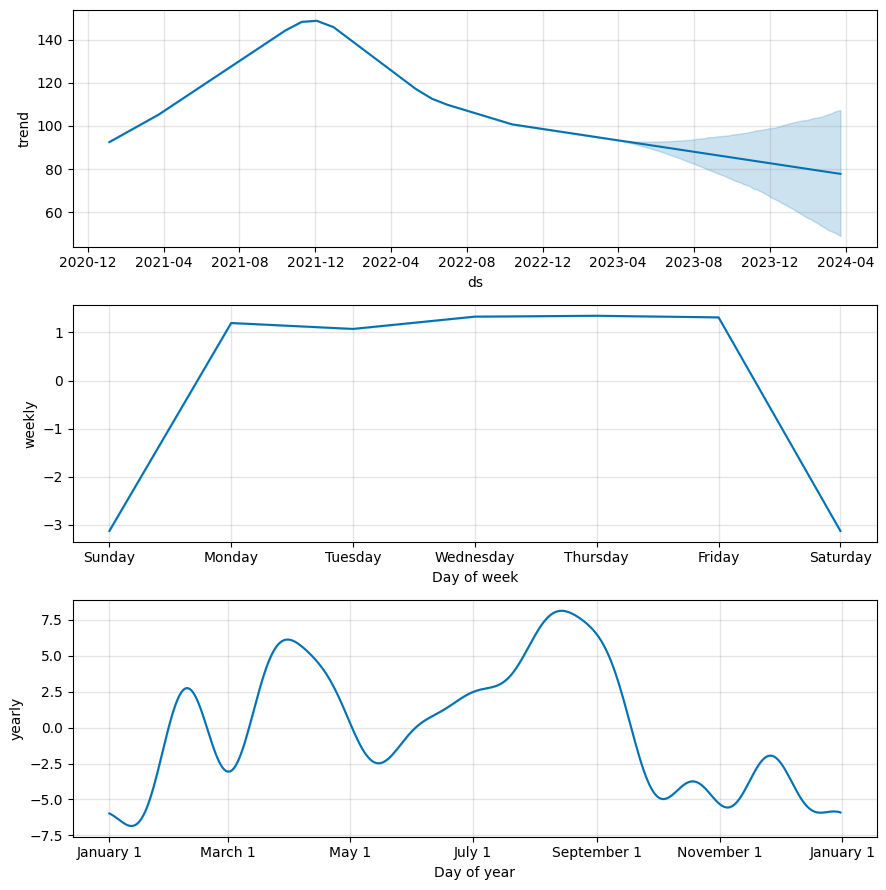

In [26]:
ga_pred,ga_model = fbprophet(google_classA_df)

In [27]:
# Cross Validation - Google A
ga_cv = cross_validation(ga_model, initial='250 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2021-09-25 00:00:00 and 2022-03-24 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/6jtrsd2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/im0icqo5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59650', 'data', 'file=/tmp/tmprbzaa768/6jtrsd2o.json', 'init=/tmp/tmprbzaa768/im0icqo5.json', 'output', 'file=/tmp/tmprbzaa768/prophet_modeleaxs8vxh/prophet_model-20230413185412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/b6u8kxjm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/ogt1jter.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [28]:
ga_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,142.406028,140.141311,144.425599,141.50,2021-09-25
1,2021-09-28,142.822932,140.513784,145.066966,136.18,2021-09-25
2,2021-09-29,143.595408,141.291193,145.891691,134.52,2021-09-25
3,2021-09-30,144.463689,142.188553,146.735180,133.27,2021-09-25
4,2021-10-01,145.426166,143.248835,147.666621,136.46,2021-09-25


In [29]:
# Performance Metrics - Google A
ga_p = performance_metrics(ga_cv)

In [30]:
ga_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,217.178218,14.736968,12.618592,0.096531,0.088761,0.090510,0.08
1,37 days,217.284191,14.740563,12.626709,0.096573,0.088761,0.090510,0.08
2,38 days,217.654727,14.753126,12.696560,0.097048,0.088761,0.090977,0.06
3,39 days,233.373597,15.276570,13.072695,0.100491,0.089038,0.093879,0.06
4,40 days,246.733713,15.707760,13.340386,0.103095,0.089756,0.095989,0.08


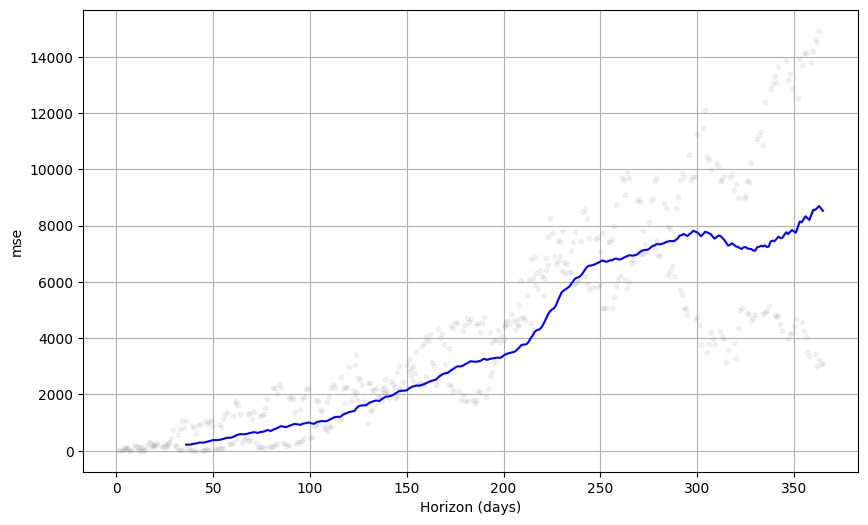

In [31]:
# Plotting - Google A
fig4 = plot_cross_validation_metric(ga_cv, metric='mse')

### Google Class C Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/pp71_mfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/4uy8p7fm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90329', 'data', 'file=/tmp/tmprbzaa768/pp71_mfv.json', 'init=/tmp/tmprbzaa768/4uy8p7fm.json', 'output', 'file=/tmp/tmprbzaa768/prophet_model033e4nww/prophet_model-20230413185414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


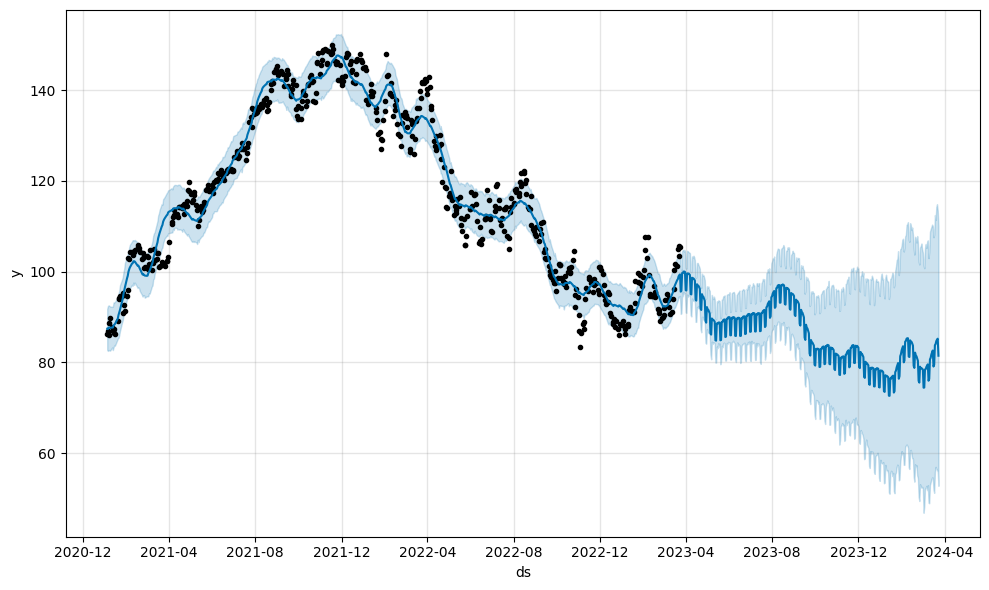

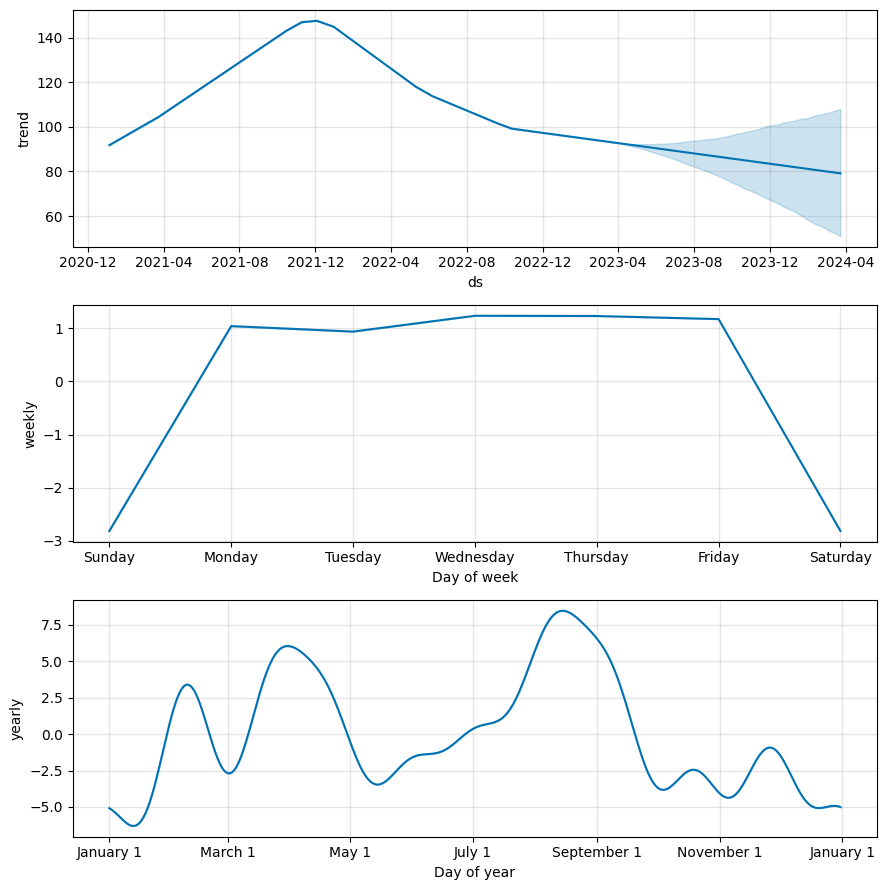

In [32]:
gc_pred,gc_model = fbprophet(google_classC_df)

In [33]:
# Cross Validation - Google C
gc_cv = cross_validation(gc_model, initial='250 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2021-09-25 00:00:00 and 2022-03-24 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/acg_mq4_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/i7jtq7y8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92053', 'data', 'file=/tmp/tmprbzaa768/acg_mq4_.json', 'init=/tmp/tmprbzaa768/i7jtq7y8.json', 'output', 'file=/tmp/tmprbzaa768/prophet_modelje4as2c_/prophet_model-20230413185416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/pjmjl5lp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/aux7zc_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [34]:
gc_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,143.732977,141.515080,145.693713,141.07,2021-09-25
1,2021-09-28,144.744977,142.500354,147.028825,135.83,2021-09-25
2,2021-09-29,146.302193,144.133716,148.492057,134.35,2021-09-25
3,2021-09-30,147.851082,145.683422,150.039500,133.68,2021-09-25
4,2021-10-01,149.611093,147.354262,151.742447,136.54,2021-09-25


In [35]:
# Performance Metrics - Google C
gc_p = performance_metrics(gc_cv)

In [36]:
gc_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,425.683758,20.632105,18.039457,0.135422,0.132149,0.124625,0.06
1,37 days,425.938812,20.638285,18.056532,0.135528,0.132149,0.124676,0.06
2,38 days,426.102680,20.642255,18.081464,0.135688,0.132149,0.124833,0.06
3,39 days,438.464130,20.939535,18.303913,0.138006,0.143498,0.126700,0.08
4,40 days,448.908686,21.187465,18.487472,0.139981,0.153435,0.128263,0.10


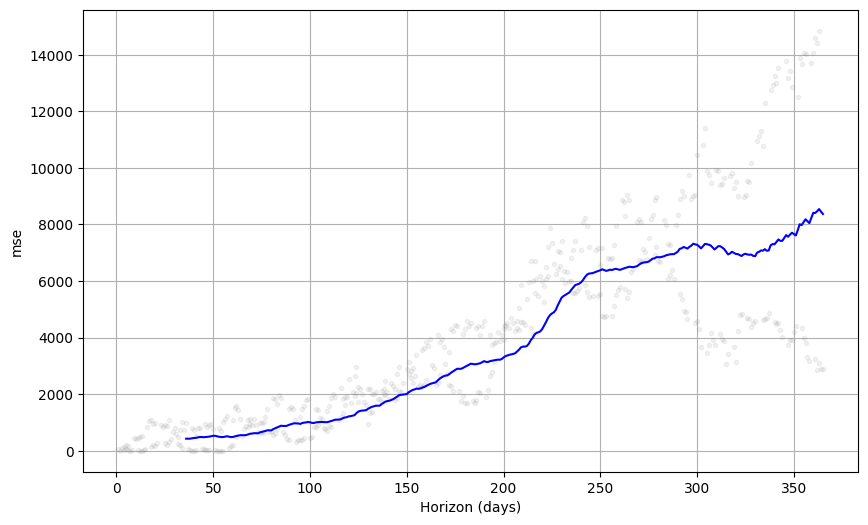

In [37]:
# Plotting - Google C
fig5 = plot_cross_validation_metric(gc_cv, metric='mse')

### Netflix Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/1k12bvuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/_6goeuyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65476', 'data', 'file=/tmp/tmprbzaa768/1k12bvuq.json', 'init=/tmp/tmprbzaa768/_6goeuyu.json', 'output', 'file=/tmp/tmprbzaa768/prophet_modelei92f2j8/prophet_model-20230413185418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


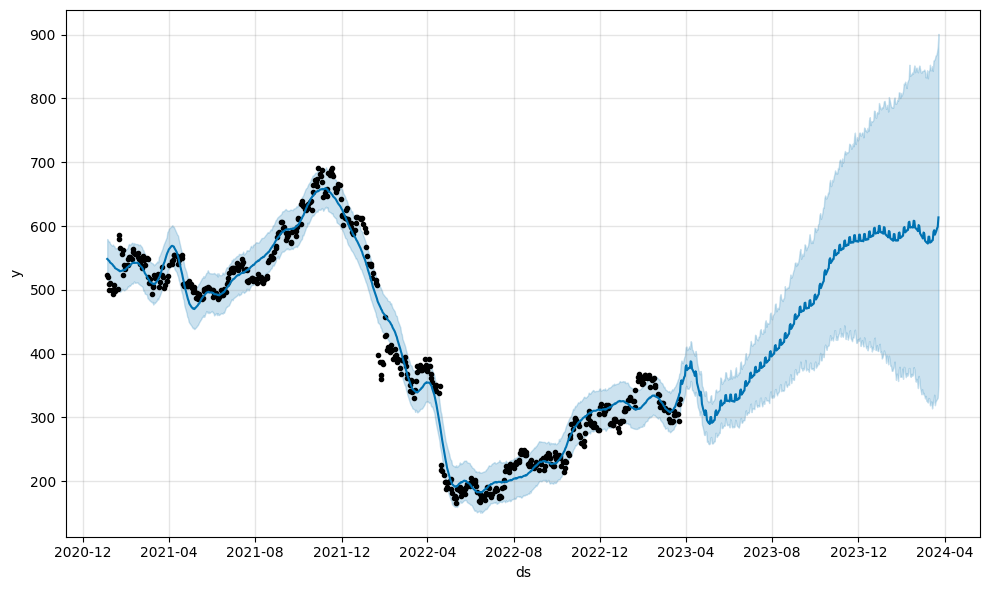

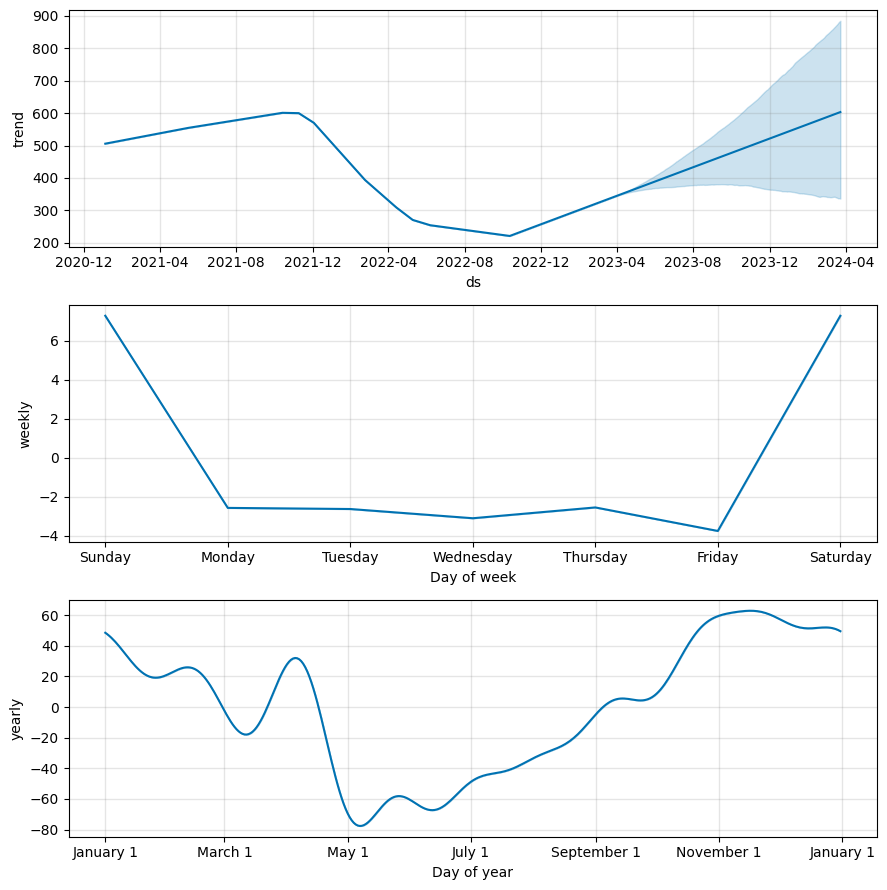

In [38]:
net_pred,net_model = fbprophet(netflix_df)

In [39]:
# Cross Validation - Netflix
net_cv = cross_validation(net_model, initial='250 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2021-09-25 00:00:00 and 2022-03-24 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/li4pcfa_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/isrmwchu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55087', 'data', 'file=/tmp/tmprbzaa768/li4pcfa_.json', 'init=/tmp/tmprbzaa768/isrmwchu.json', 'output', 'file=/tmp/tmprbzaa768/prophet_modell7c4mgia/prophet_model-20230413185419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/j6am2yin.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbzaa768/84c7vnc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [40]:
net_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,626.577149,613.365219,639.973750,592.64,2021-09-25
1,2021-09-28,642.084743,628.587057,655.208169,583.85,2021-09-25
2,2021-09-29,657.671956,644.326027,670.975985,599.06,2021-09-25
3,2021-09-30,678.351489,664.135417,690.928500,610.34,2021-09-25
4,2021-10-01,699.729587,685.838314,713.073417,613.15,2021-09-25


In [41]:
# Performance Metrics - Netflix
net_p = performance_metrics(net_cv)

In [42]:
net_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,45719.375559,213.820896,159.444887,0.340461,0.274376,0.267007,0.18
1,37 days,45733.606473,213.854171,159.787100,0.340668,0.274376,0.267222,0.16
2,38 days,45823.676426,214.064655,160.612382,0.341742,0.274376,0.268458,0.16
3,39 days,46476.287731,215.583598,164.243536,0.356301,0.291249,0.280017,0.15
4,40 days,47306.491443,217.500555,168.686002,0.372099,0.316089,0.293021,0.13


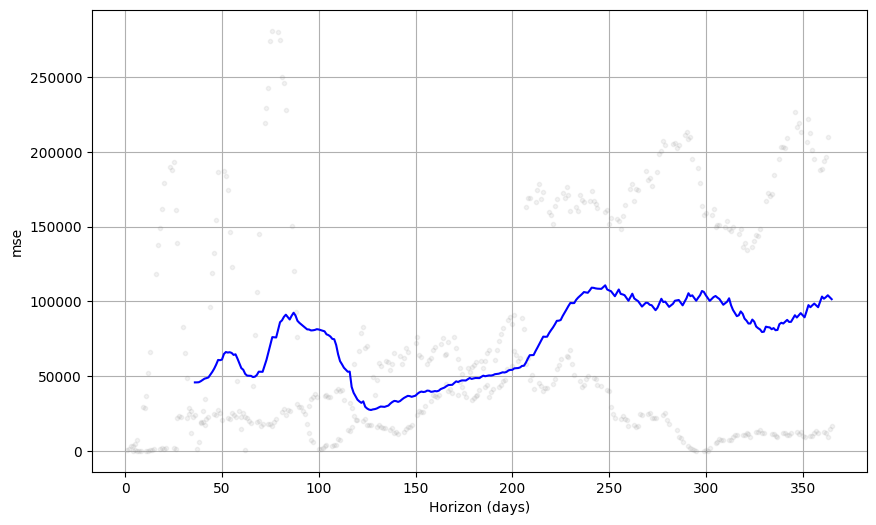

In [43]:
# Plotting - Netflix
fig6 = plot_cross_validation_metric(net_cv, metric='mse')